# Cat and Dog Classification

<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg'>

Entrainement d'un modèle de classification de chats et de chiens à partir de zéro via le jeu de données Kaggle : https://www.kaggle.com/c/dogs-vs-cats



## 1. Traitements des données

In [ ]:
#from git import Repo
#Repo.clone_from("https://github.com/Mickevin/Cat-Dog-Dataset.git", "./dogs-vs-cats/", )

In [1]:
import os
path = 'Cat-Dog-Dataset/train/'
list_dir = os.listdir(path)
len(list_dir)

25000

In [16]:
!docker --version

Docker version 23.0.5, build bc4487a


In [15]:
os.listdir('./Cat-Dog-Dataset/train')

['cat.8740.jpg',
 'cat.7473.jpg',
 'dog.5726.jpg',
 'dog.2049.jpg',
 'cat.7498.jpg',
 'dog.5915.jpg',
 'cat.8973.jpg',
 'cat.6786.jpg',
 'cat.3826.jpg',
 'cat.214.jpg',
 'cat.4191.jpg',
 'dog.9691.jpg',
 'cat.3198.jpg',
 'dog.7864.jpg',
 'dog.9849.jpg',
 'cat.572.jpg',
 'cat.2286.jpg',
 'dog.12195.jpg',
 'cat.11909.jpg',
 'dog.10782.jpg',
 'cat.1957.jpg',
 'dog.11488.jpg',
 'dog.2908.jpg',
 'dog.10796.jpg',
 'cat.1943.jpg',
 'dog.9685.jpg',
 'dog.7870.jpg',
 'cat.2292.jpg',
 'cat.566.jpg',
 'dog.12181.jpg',
 'cat.3832.jpg',
 'cat.200.jpg',
 'cat.4185.jpg',
 'dog.5901.jpg',
 'cat.8967.jpg',
 'dog.599.jpg',
 'cat.6792.jpg',
 'cat.10395.jpg',
 'cat.228.jpg',
 'dog.1597.jpg',
 'cat.8797.jpg',
 'cat.6962.jpg',
 'dog.3380.jpg',
 'dog.5929.jpg',
 'cat.9489.jpg',
 'dog.2920.jpg',
 'dog.4389.jpg',
 'dog.10966.jpg',
 'dog.5097.jpg',
 'dog.7858.jpg',
 'cat.4813.jpg',
 'dog.9875.jpg',
 'dog.7680.jpg',
 'cat.11935.jpg',
 'cat.4807.jpg',
 'dog.9861.jpg',
 'cat.11921.jpg',
 'dog.7694.jpg',
 'dog.2934

In [2]:
try:
    os.mkdir('./Cat-Dog-Dataset/validation/')
except:
    pass

In [3]:
sum([True if 'cat' in name else False for name in list_dir])

12500

In [5]:
import shutil
[shutil.move(path+u, './Cat-Dog-Dataset/validation/') for u in list_dir[:len(list_dir)//5]]

['./dogs-vs-cats/validation/dog.8011.jpg',
 './dogs-vs-cats/validation/cat.5077.jpg',
 './dogs-vs-cats/validation/dog.7322.jpg',
 './dogs-vs-cats/validation/cat.2718.jpg',
 './dogs-vs-cats/validation/cat.10151.jpg',
 './dogs-vs-cats/validation/cat.3406.jpg',
 './dogs-vs-cats/validation/dog.1753.jpg',
 './dogs-vs-cats/validation/cat.4369.jpg',
 './dogs-vs-cats/validation/cat.7660.jpg',
 './dogs-vs-cats/validation/dog.5535.jpg',
 './dogs-vs-cats/validation/cat.8553.jpg',
 './dogs-vs-cats/validation/cat.9895.jpg',
 './dogs-vs-cats/validation/cat.1211.jpg',
 './dogs-vs-cats/validation/dog.3144.jpg',
 './dogs-vs-cats/validation/dog.775.jpg',
 './dogs-vs-cats/validation/dog.11102.jpg',
 './dogs-vs-cats/validation/cat.6218.jpg',
 './dogs-vs-cats/validation/dog.11664.jpg',
 './dogs-vs-cats/validation/dog.3622.jpg',
 './dogs-vs-cats/validation/cat.1577.jpg',
 './dogs-vs-cats/validation/cat.12020.jpg',
 './dogs-vs-cats/validation/dog.5253.jpg',
 './dogs-vs-cats/validation/cat.7106.jpg',
 './dogs

In [14]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df = pd.DataFrame(os.listdir('Cat-Dog-Dataset/train'), columns=['filename'])
df['label'] = ['1' if 'cat' in name else '0' for name in df['filename']]
df

,filename,label
0,cat.8740.jpg,1
1,cat.7473.jpg,1
2,dog.5726.jpg,0
3,dog.2049.jpg,0
4,cat.7498.jpg,1
...,...,...
19995,dog.8008.jpg,0
19996,dog.1992.jpg,0
19997,dog.12412.jpg,0
19998,cat.2701.jpg,1


In [7]:
import pandas as pd

# Créez un DataFrame avec les noms des images et les labels correspondants
df_val = pd.DataFrame(os.listdir('dogs-vs-cats/validation'), columns=['filename'])
df_val['label'] = ['1' if 'cat' in name else '0' for name in df_val['filename']]
df_val

,filename,label
0,dog.8011.jpg,0
1,cat.5077.jpg,1
2,dog.7322.jpg,0
3,cat.2718.jpg,1
4,cat.10151.jpg,1
...,...,...
4995,dog.566.jpg,0
4996,dog.3357.jpg,0
4997,cat.8998.jpg,1
4998,dog.4438.jpg,0


In [8]:
df.label.value_counts()

1    10008
0     9992
Name: label, dtype: int64

(374, 500, 3)

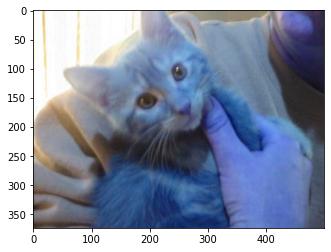

In [13]:
from cv2 import imread, resize
import matplotlib.pyplot as plt
path = 'Cat-Dog-Dataset/train/'

plt.imshow(imread(path+df.filename[0]))
imread(path+df.filename[0]).shape

## 2. Création du modèle

In [10]:
import tensorflow as tf

# Création du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-01 16:00:38.125685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-01 16:00:38.125844: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      896       
                                                                 
 dropout (Dropout)           (None, 498, 498, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 64)      18496     
                                                                 
 dropout_1 (Dropout)         (None, 247, 247, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 64)     0         
 2D)                                                    

In [11]:
model.predict(resize(imread(path+df.filename[90]), (500, 500)).reshape(1, 500, 500, 3))

1/1 [==============================] - 0s 159ms/step


2023-06-01 16:00:38.427775: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-01 16:00:38.483416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[6.5919245e-05]], dtype=float32)

## 3. Entrainement du modèle

In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créez un générateur d'images à partir du DataFrame
datagen = ImageDataGenerator(rescale=1./255)  # Rééchelonne les valeurs des pixels entre 0 et 1

# Générateur d'images à partir du DataFrame
generator = datagen.flow_from_dataframe(
    dataframe=df[:5000],
    directory=path,
    x_col='filename',
    y_col='label',
    target_size=(500, 500), 
    class_mode='binary',
    batch_size=32
)

generator_val = datagen.flow_from_dataframe(
    dataframe=df_val[:100],
    directory='Cat-Dog-Dataset/validation/',
    x_col='filename',
    y_col='label',
    target_size=(500, 500), 
    class_mode='binary',
    batch_size=32
)


# Entraînez le modèle en utilisant le générateur d'images
history = model.fit(generator, epochs=10,validation_data=generator_val)

Found 5000 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/10


2023-06-01 16:00:41.433941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 1.1824 - accuracy: 0.5328

2023-06-01 16:02:09.417757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 89s 542ms/step - loss: 1.1824 - accuracy: 0.5328 - val_loss: 0.6886 - val_accuracy: 0.5800
Epoch 2/10
157/157 [==============================] - 86s 550ms/step - loss: 0.6847 - accuracy: 0.5636 - val_loss: 0.6867 - val_accuracy: 0.5400
Epoch 3/10
157/157 [==============================] - 85s 544ms/step - loss: 0.6524 - accuracy: 0.6118 - val_loss: 0.6588 - val_accuracy: 0.6600
Epoch 4/10
157/157 [==============================] - 85s 543ms/step - loss: 0.6069 - accuracy: 0.6836 - val_loss: 0.6748 - val_accuracy: 0.6200
Epoch 5/10
157/157 [==============================] - 85s 542ms/step - loss: 0.4843 - accuracy: 0.7638 - val_loss: 0.6730 - val_accuracy: 0.5900
Epoch 6/10
157/157 [==============================] - 85s 542ms/step - loss: 0.3733 - accuracy: 0.8482 - val_loss: 0.7873 - val_accuracy: 0.5900
Epoch 7/10
157/157 [==============================] - 85s 540ms/step - loss: 0.2171 - accuracy: 0.9172 - val_loss: 0.7787 - val_accuracy: 0.5

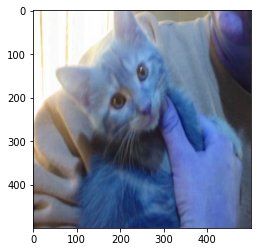

In [22]:
img = resize( imread(path+df.filename[0]), (500, 500))
plt.imshow(img/255)

## 4. Evaluation du modèle

In [24]:

def pred_and_show_image(n):
    p = path+df.filename[n]
    plt.imshow(imread(p))
    plt.show()
    img = resize(imread(p), (500, 500)).reshape(1, 500, 500, 3)
    pred = model.predict(img)[0][0]
    
    dict_value = {'0': 'Chien', '1': 'Chat'}
    print(f"Prediction : {dict_value[str(int(pred> 0.5))]}")
    # Prédiction probabiliste
    print(f"Probabilité : {pred}")
    return pred


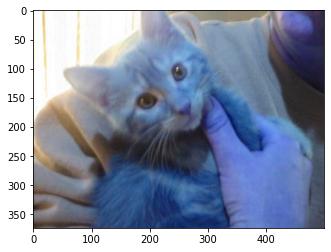

1/1 [==============================] - 0s 103ms/step
Prediction : Chat
Probabilité : 1.0


2023-05-18 15:52:45.212974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


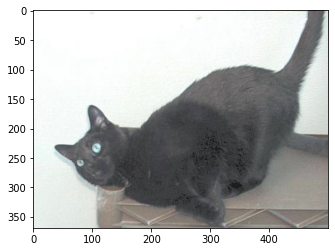

1/1 [==============================] - 0s 22ms/step
Prediction : Chat
Probabilité : 1.0


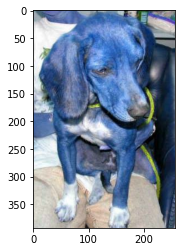

1/1 [==============================] - 0s 15ms/step
Prediction : Chien
Probabilité : 0.0


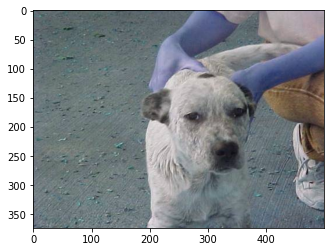

1/1 [==============================] - 0s 23ms/step
Prediction : Chien
Probabilité : 5.816951354995406e-38


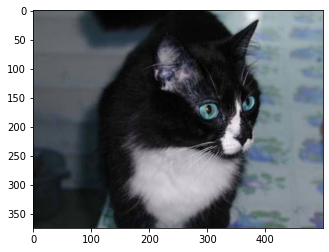

1/1 [==============================] - 0s 15ms/step
Prediction : Chat
Probabilité : 1.0


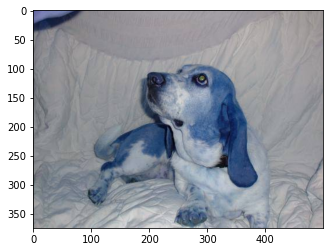

1/1 [==============================] - 0s 14ms/step
Prediction : Chien
Probabilité : 0.0


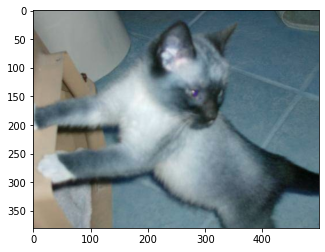

1/1 [==============================] - 0s 14ms/step
Prediction : Chat
Probabilité : 1.0


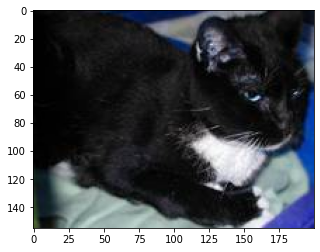

1/1 [==============================] - 0s 15ms/step
Prediction : Chat
Probabilité : 1.0


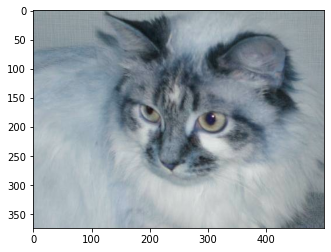

1/1 [==============================] - 0s 13ms/step
Prediction : Chat
Probabilité : 1.0


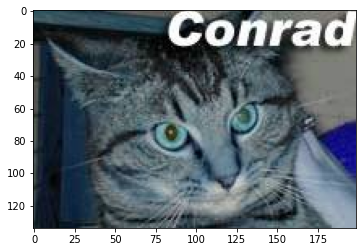

1/1 [==============================] - 0s 16ms/step
Prediction : Chat
Probabilité : 1.0


[1.0, 1.0, 0.0, 5.8169514e-38, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0]

In [25]:
[pred_and_show_image(n) for n in range(10)]

In [26]:
# Sauvegarde du modèle pickle
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://5735b90e-b41a-46fb-b9f2-774347a948e2/assets


INFO:tensorflow:Assets written to: ram://5735b90e-b41a-46fb-b9f2-774347a948e2/assets


In [39]:
model.save('model.h5')

In [94]:
pred = df.filename.apply(lambda x: str(int(model.predict(resize(imread(path+x), 
                                                      (500, 380)).reshape(1, 500, 380, 3)/ 255.0, 
                                                      verbose=False)[0][0])))

In [28]:
(pred == df.label).sum()/len(pred)

NameError: name 'pred' is not defined

In [29]:
n = 200
a = df[:n].filename.apply(lambda x: str(int(model.predict(resize(imread(path+x)/ 255, 
                                                      (500, 500)).reshape(1, 500, 500, 3), 
                                                      verbose=False)[0])))

(a == df[:n].label).sum()/len(a)

2023-05-18 15:53:21.948322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.675

In [32]:
image = imread(path+df.filename[0])
image = resize(image, (500, 500))
image = image / 255.0  # Normalize the image

# Reshape the image to match the input shape of the model
image = image.reshape(1, 500, 500, 3)

# Load the trained model pickle
model_ = pickle.load(open('model.pkl', 'rb'))

# Make a prediction
prediction = model_.predict(image)
prediction

1/1 [==============================] - 0s 80ms/step


2023-05-18 15:54:09.065040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.9997832]], dtype=float32)

In [37]:

def pred_and_show_image(show=False):
    path_img = 'static/assets/img.jpg'
    img = resize(imread(path_img), (500, 500)).reshape(1, 500, 500, 3)/255

    if show:
        plt.imshow(img[0])
        plt.show()

    model_ = pickle.load(open('model.pkl', 'rb'))
    pred = model_.predict(img)[0][0]
    
    dict_value = {'0': 'Chien', '1': 'Chat'}

    class_predict = dict_value[str(int(pred> 0.5))]
    
    print(f"Prediction : {class_predict}")
    print(f"Probabilité : {pred}")
    return pred, class_predict

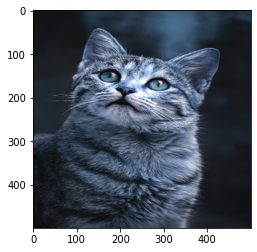

2023-05-18 15:58:42.895367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 80ms/step
Prediction : Chat
Probabilité : 0.9978867173194885


(0.9978867, 'Chat')

In [38]:
pred_and_show_image(True)